In [1]:
import os 
import pandas as pd
import glob
import wget
import seaborn as sns 
import numpy as np
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
%matplotlib inline

os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')
outdir = 'results/main/dice_gene_expression/'
os.makedirs(outdir, exist_ok=True)

## Download the DICE Data

In [2]:
diceweb_to_loop_names = {'B_CELL_NAIVE': 'NB',
                        'MONOCYTES': 'CM',
                        'M2': 'M2',
                        'NK': 'NK',
                        'TREG_MEM': 'TREGMEM',
                        'CD4_NAIVE': 'CD4N',
                        'CD4_STIM': 'CD4S',
                        'TREG_NAIVE': 'TREGNAIVE',
                        'TFH': 'TFH',
                        'TH1': 'TH1',
                        'THSTAR': 'THSTAR',
                        'TH17': 'TH17',
                        'TH2': 'TH2',
                        'CD8_NAIVE': 'CD8N',
                        'CD8_STIM': 'CD8S'}

rnaseq_dice_links = ['https://dice-database.org/download/B_CELL_NAIVE_TPM.csv', 
                     'https://dice-database.org/download/MONOCYTES_TPM.csv',
                     'https://dice-database.org/download/M2_TPM.csv',
                     'https://dice-database.org/download/NK_TPM.csv',
                     'https://dice-database.org/download/TREG_MEM_TPM.csv',
                     'https://dice-database.org/download/CD4_NAIVE_TPM.csv',
                     'https://dice-database.org/download/CD4_STIM_TPM.csv',
                     'https://dice-database.org/download/TREG_NAIVE_TPM.csv',
                     'https://dice-database.org/download/TFH_TPM.csv', 
                     'https://dice-database.org/download/TH1_TPM.csv',
                     'https://dice-database.org/download/THSTAR_TPM.csv',
                     'https://dice-database.org/download/TH17_TPM.csv',
                     'https://dice-database.org/download/TH2_TPM.csv',
                     'https://dice-database.org/download/CD8_NAIVE_TPM.csv',
                     'https://dice-database.org/download/CD8_STIM_TPM.csv']

for link in rnaseq_dice_links:
    
    dice_cline = os.path.basename(link).replace('_TPM.csv', '')
    loop_cline = diceweb_to_loop_names[dice_cline]
    new_path = os.path.join(outdir, '{}_TPM.csv'.format(loop_cline))
            
    if not os.path.exists(new_path):
        file_name = wget.download(link, out=new_path)
        print(link)

https://dice-database.org/download/B_CELL_NAIVE_TPM.csv
https://dice-database.org/download/MONOCYTES_TPM.csv
https://dice-database.org/download/M2_TPM.csv
https://dice-database.org/download/NK_TPM.csv
https://dice-database.org/download/TREG_MEM_TPM.csv
https://dice-database.org/download/CD4_NAIVE_TPM.csv
https://dice-database.org/download/CD4_STIM_TPM.csv
https://dice-database.org/download/TREG_NAIVE_TPM.csv
https://dice-database.org/download/TFH_TPM.csv
https://dice-database.org/download/TH1_TPM.csv
https://dice-database.org/download/THSTAR_TPM.csv
https://dice-database.org/download/TH17_TPM.csv
https://dice-database.org/download/TH2_TPM.csv
https://dice-database.org/download/CD8_NAIVE_TPM.csv
https://dice-database.org/download/CD8_STIM_TPM.csv


## Load the Data

In [3]:
#gene_annos = df[['Feature_name', 'Transcript_Length(bp)', 'Additional_annotations']]

In [4]:
all_data = []
for dice_cline, loop_cline in diceweb_to_loop_names.items():

    fn = 'results/main/dice_gene_expression/{}_TPM.csv'.format(loop_cline)

    print(fn)

    df = pd.read_csv(fn)
    df.index = df.Feature_name.str.replace('\.[0-9]+', '', regex=True)
    df.drop(['Feature_name', 'Transcript_Length(bp)', 'Additional_annotations'], axis=1, inplace=True)
    df.loc[:, 'cline'] = loop_cline
    all_data.append(df)    


results/main/dice_gene_expression/NB_TPM.csv
results/main/dice_gene_expression/CM_TPM.csv
results/main/dice_gene_expression/M2_TPM.csv
results/main/dice_gene_expression/NK_TPM.csv
results/main/dice_gene_expression/TREGMEM_TPM.csv
results/main/dice_gene_expression/CD4N_TPM.csv
results/main/dice_gene_expression/CD4S_TPM.csv
results/main/dice_gene_expression/TREGNAIVE_TPM.csv
results/main/dice_gene_expression/TFH_TPM.csv
results/main/dice_gene_expression/TH1_TPM.csv
results/main/dice_gene_expression/THSTAR_TPM.csv
results/main/dice_gene_expression/TH17_TPM.csv
results/main/dice_gene_expression/TH2_TPM.csv
results/main/dice_gene_expression/CD8N_TPM.csv
results/main/dice_gene_expression/CD8S_TPM.csv


In [5]:
all_df = pd.concat(all_data)

In [6]:
all_df

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,cline
Feature_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,1.102855,0.787619,0.782210,0.743613,0.731157,0.722818,0.704557,0.697411,0.672983,0.666182,...,0.133081,0.122123,0.108031,0.071715,0.068885,0.067379,0.060864,0.000000,0.000000,NB
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NB
ENSG00000000419,183.866738,176.360749,150.901130,147.246804,146.381212,144.753933,142.198343,135.790282,130.137329,128.956850,...,82.894723,81.582643,79.728881,79.454542,77.910694,77.796118,77.234762,67.594100,65.335429,NB
ENSG00000000457,32.043609,31.172579,30.732048,30.341668,30.287886,30.112584,29.892220,29.475042,28.933360,28.151802,...,14.981120,14.705860,14.276945,14.268698,12.641759,12.270348,12.222083,12.169092,10.503712,NB
ENSG00000000460,19.648137,17.902580,17.872048,17.755179,17.582137,17.037854,15.732126,15.645249,15.533647,15.501955,...,9.702637,9.647632,9.276205,9.264137,8.773519,8.537409,7.353267,6.385077,5.611507,NB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000284744,1.365230,0.905732,0.905256,0.811102,0.752010,0.734300,0.602910,0.598969,0.576789,0.567243,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,CD8S
ENSG00000284745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,CD8S
ENSG00000284746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,CD8S


# Plot gene expression form all Clines

In [7]:
gene_ref = 'results/refs/gencode/v30/gencode.v30.annotation.grch37.genes_only.bed'
gencode = pd.read_table(gene_ref, header=None)
gencode.columns = ['chr', 'gene_start', 'gene_end', 'gene_strand', 'type', 'geneid', 'genename']
gencode.set_index('geneid', inplace=True)

In [8]:
select_genes = ['ENSG00000134460', 'ENSG00000111300', 'ENSG00000198270',
                   'ENSG00000090104', 'ENSG00000134453', 'ENSG00000160183',
                   'ENSG00000124610', 'ENSG00000226455', 'ENSG00000197728',
                   'ENSG00000272703', 'ENSG00000163599']

### Log10(TPM + 1) Values

In [9]:
from itertools import chain

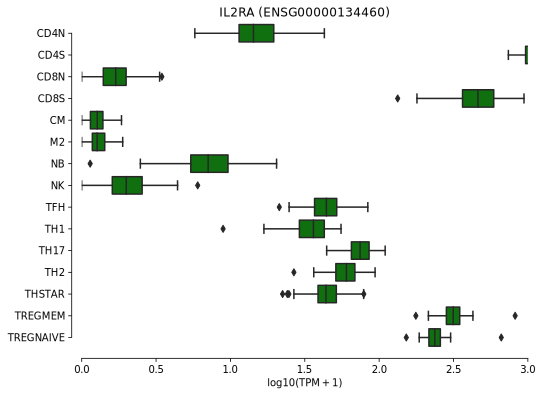

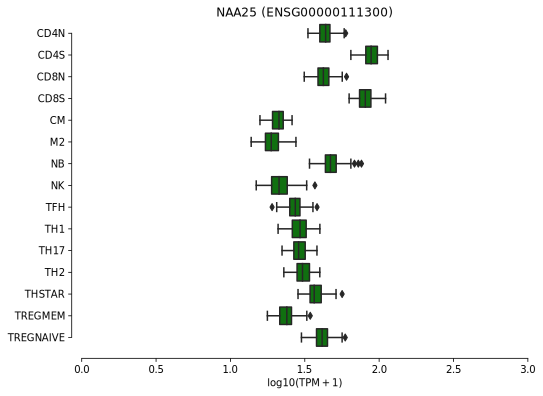

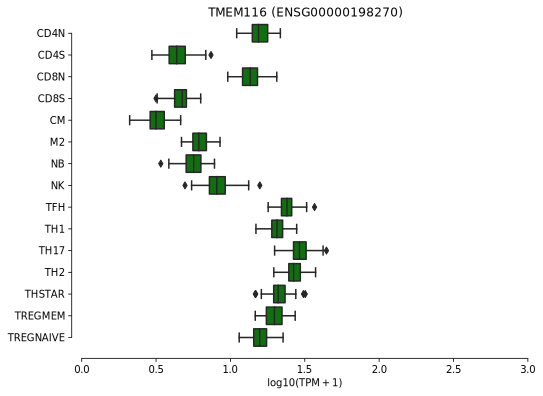

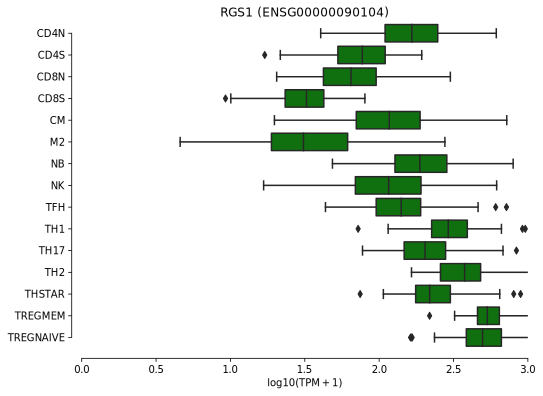

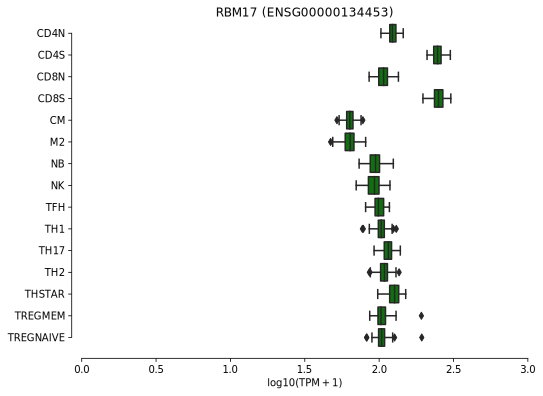

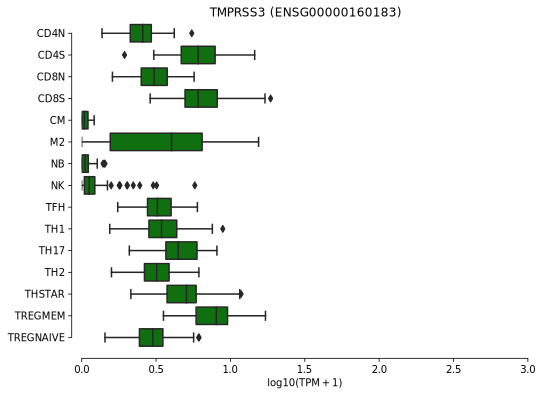

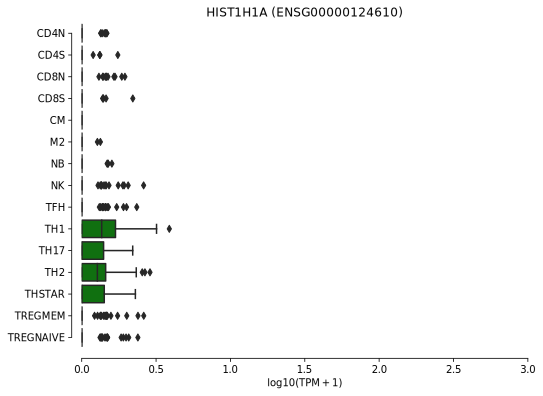

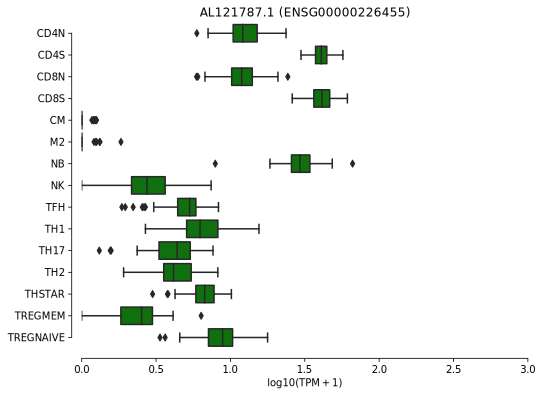

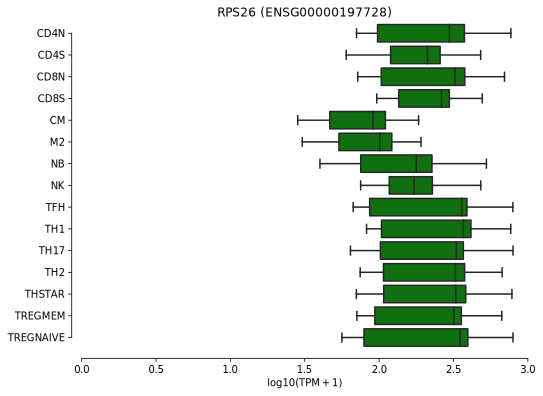

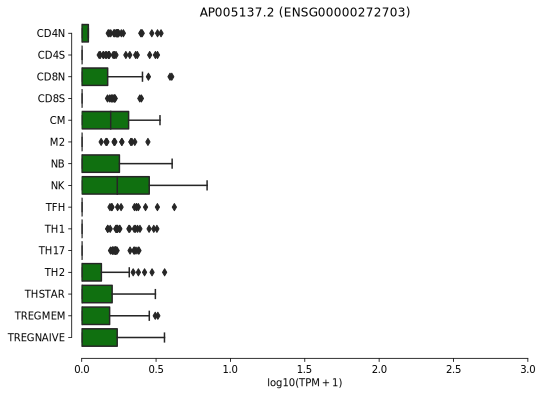

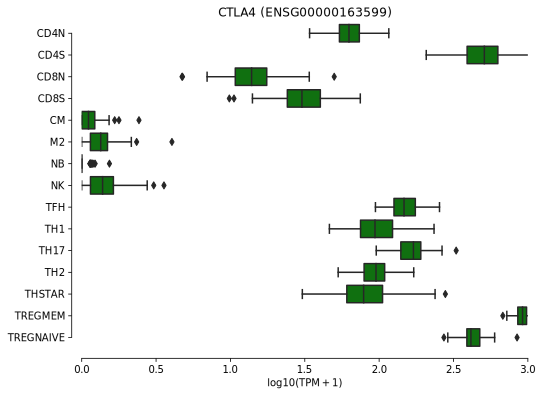

In [10]:
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(8, 14))
# axes = chain(*axes)

i = 0 
# for gene, ax in zip(select_genes, axes):   

for gene in select_genes:
    
    plot_data = all_df.loc[gene]
    plot_data.reset_index(inplace=True, drop=True)   
    plot_data = plot_data.melt(id_vars='cline', value_name='tpm').drop('variable', axis=1)
    #plot_data.dropna(inplace=True)
    plot_data.sort_values('cline', inplace=True)
    plot_data['log10_tpm'] = np.log10(plot_data['tpm'] + 1)

    fig, ax = plt.subplots(figsize=(8,6), )
    #sns.boxplot(x="cline", y="tpm", palette=["m", "g"], data=plot_data, ax=ax, orient='v')
    sns.boxplot(y="cline", x="log10_tpm", palette=["g"], data=plot_data, ax=ax, orient='h')
    
    # create the title 
    genename = gencode.loc[gene, 'genename']
    title = '{} ({})'.format(genename, gene)
    #title = '{}'.format(genename)

    #     if i % 4 != 0:
    #         ax.tick_params(
    #         axis='y',          # changes apply to the x-axis
    #         which='both',      # both major and minor ticks are affected
    #         left=False,      # ticks along the bottom edge are off
    #         labelleft=False) # labels along the bottom edge are off
    
    # set labels and xlims
    url = 'https://dice-database.org/genes/{}'.format(genename)
    ax.set_title(title, url=url)
    ax.set_ylabel('')
    ax.set_xlabel('$log10(TPM + 1)$')
    ax.set_xlim(0, 3)
    sns.despine(offset=10, trim=True)
    
    fn = os.path.join(outdir, 'all_cells.log10_tpm.{}.png'.format(gene))
    fig.savefig(fn, dpi=600)
    
    
    i += 1 
    

### Raw TPM Values

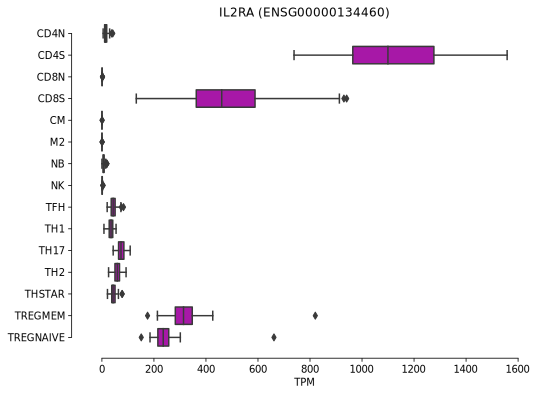

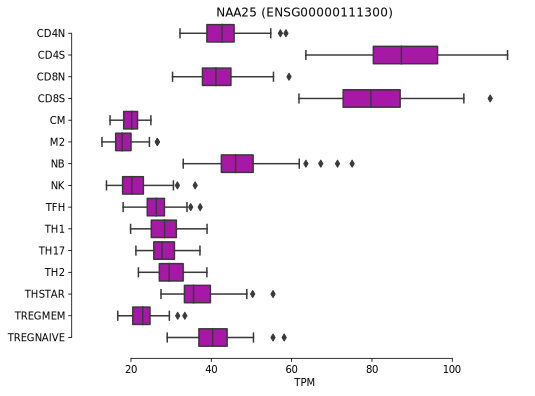

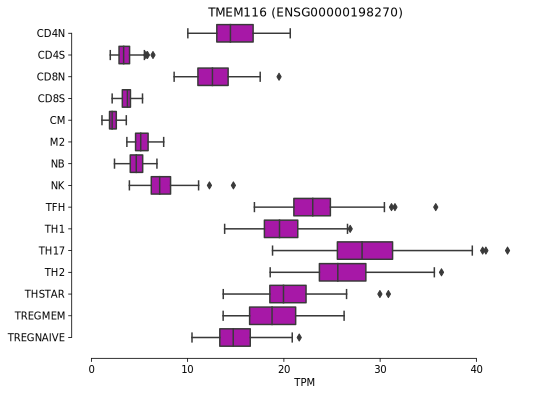

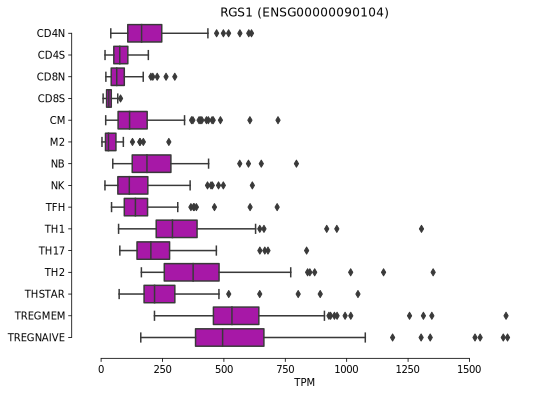

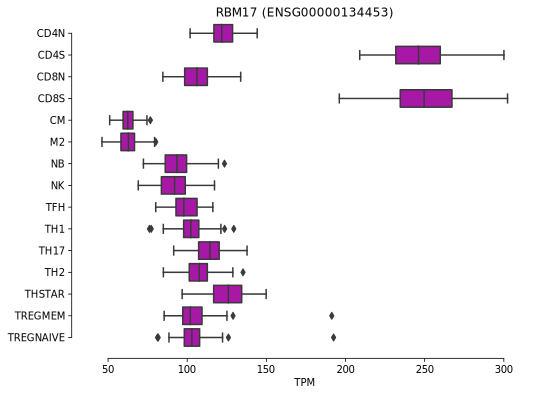

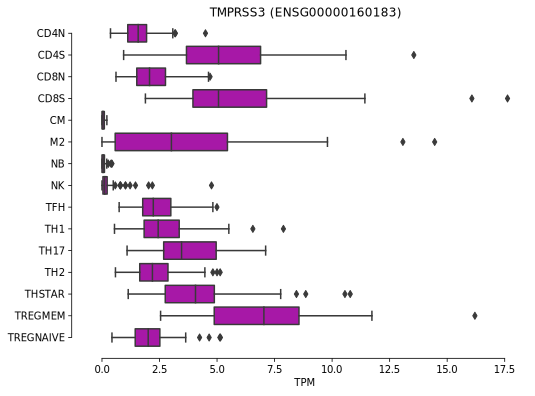

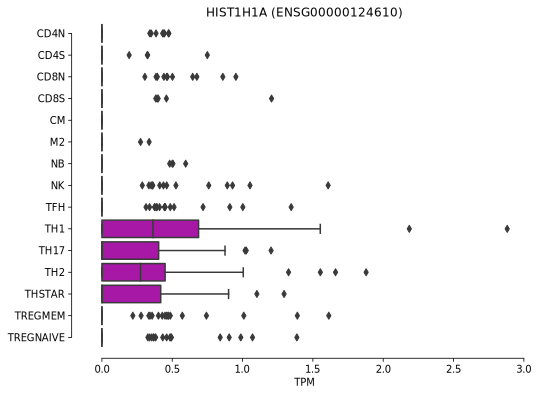

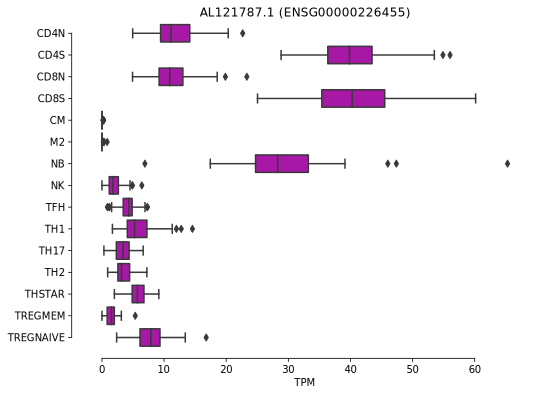

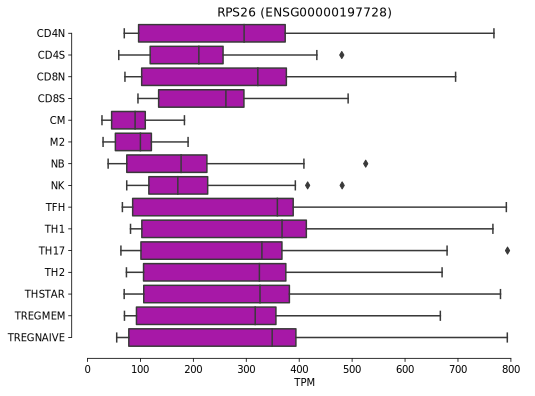

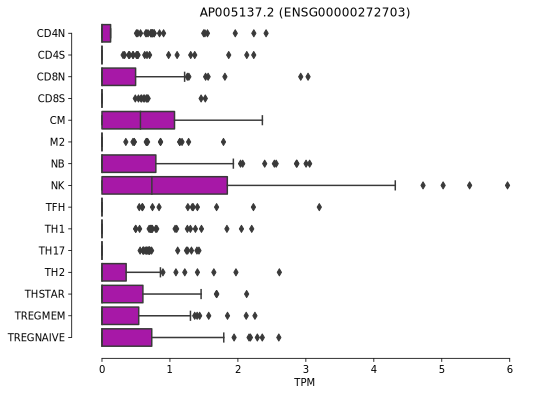

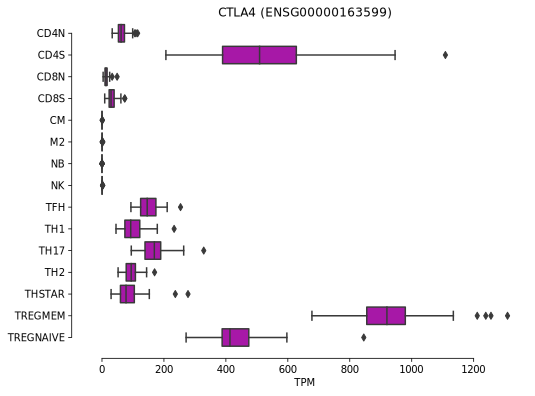

In [11]:
for gene in select_genes:    
    plot_data = all_df.loc[gene]
    plot_data.reset_index(inplace=True, drop=True)   
    plot_data = plot_data.melt(id_vars='cline', value_name='tpm').drop('variable', axis=1)
    #plot_data.dropna(inplace=True)
    plot_data.sort_values('cline', inplace=True)

    fig, ax = plt.subplots(figsize=(8,6), )
    #sns.boxplot(x="cline", y="tpm", palette=["m", "g"], data=plot_data, ax=ax, orient='v')
    sns.boxplot(y="cline", x="tpm", palette=["m"], data=plot_data, ax=ax, orient='h')
    
    # create the title 
    genename = gencode.loc[gene, 'genename']
    title = '{} ({})'.format(genename, gene)
    
    # set labels and xlims
    url = 'https://dice-database.org/genes/{}'.format(genename)
    ax.set_title(title, url=url)
    ax.set_ylabel('')
    ax.set_xlabel('$TPM$')
    sns.despine(offset=10, trim=True)
    
    fn = os.path.join(outdir, 'all_cells.tpm.{}.png'.format(gene))
    fig.savefig(fn, dpi=600)    

# Plot gene expression form all Chandra et al 2021 cell lines

In [12]:
select_clines = ['NB', 'CM', 'NK', 'CD4N', 'CD8N']
select_data = all_df.loc[all_df.cline.isin(select_clines)]

### Log10(TPM + 1) Values

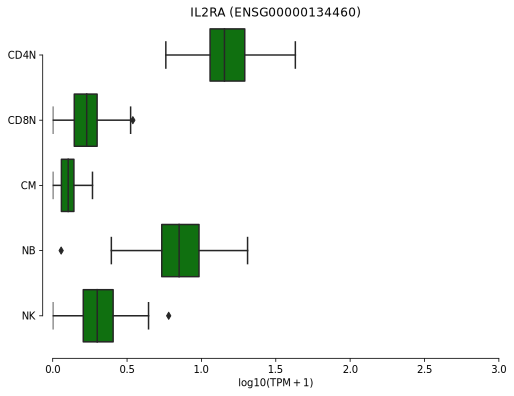

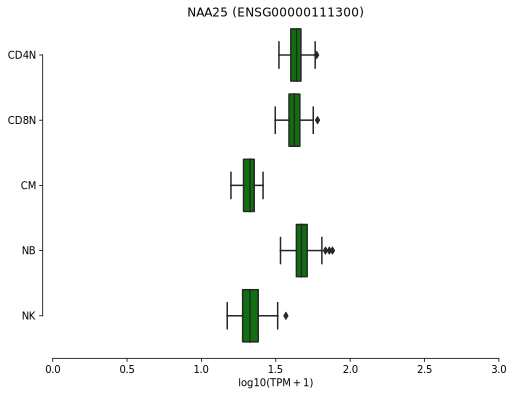

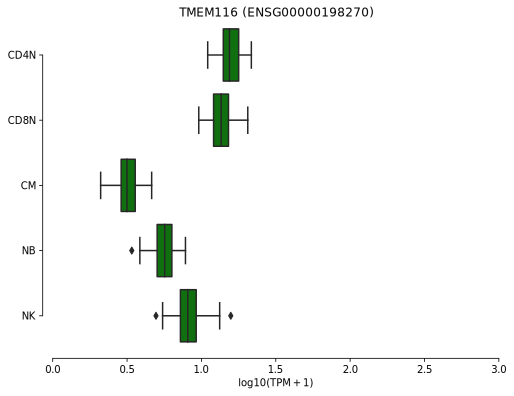

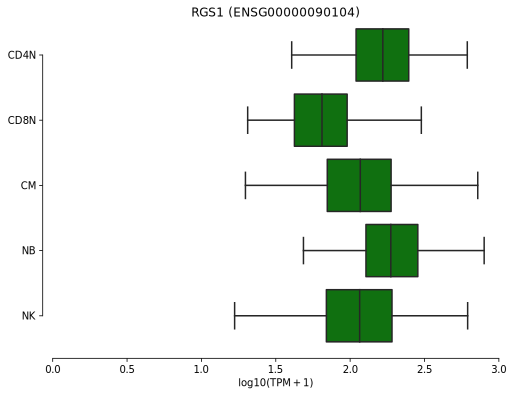

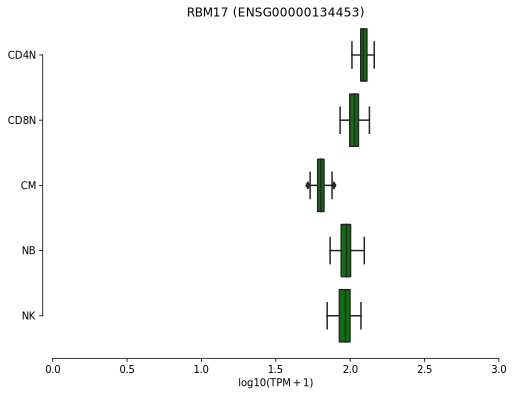

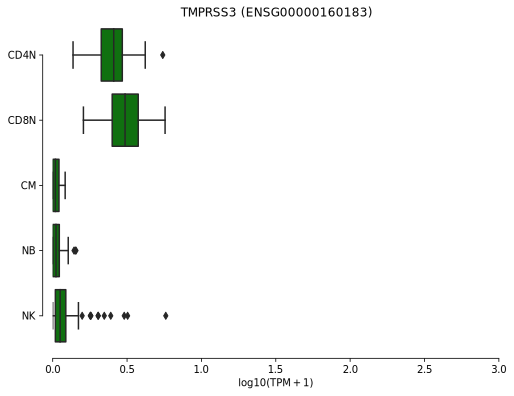

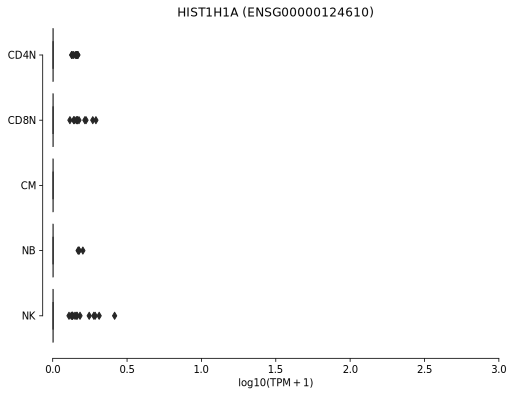

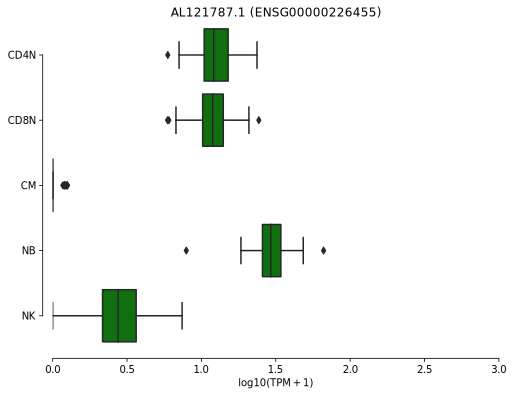

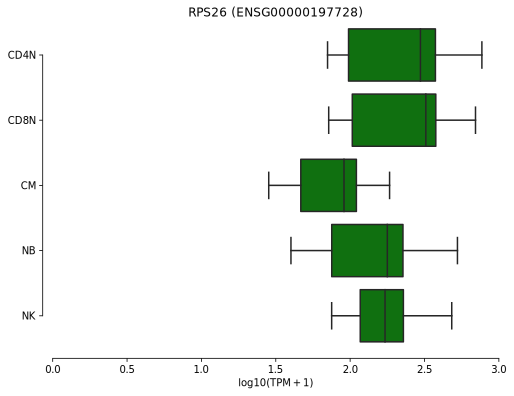

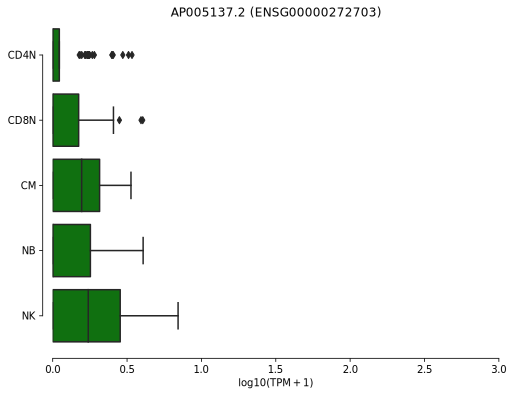

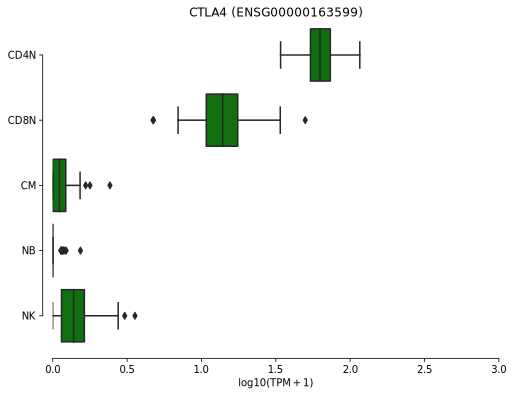

In [13]:
for gene in select_genes:    
    plot_data = select_data.loc[gene]
    plot_data.reset_index(inplace=True, drop=True)   
    plot_data = plot_data.melt(id_vars='cline', value_name='tpm').drop('variable', axis=1)
    #plot_data.dropna(inplace=True)
    plot_data.sort_values('cline', inplace=True)
    plot_data['log10_tpm'] = np.log10(plot_data['tpm'] + 1)

    fig, ax = plt.subplots(figsize=(8,6), )
    #sns.boxplot(x="cline", y="tpm", palette=["m", "g"], data=plot_data, ax=ax, orient='v')
    sns.boxplot(y="cline", x="log10_tpm", palette=["g"], data=plot_data, ax=ax, orient='h')
    
    # create the title 
    genename = gencode.loc[gene, 'genename']
    title = '{} ({})'.format(genename, gene)
    
    # set labels and xlims
    url = 'https://dice-database.org/genes/{}'.format(genename)
    ax.set_title(title, url=url)
    ax.set_ylabel('')
    ax.set_xlabel('$log10(TPM + 1)$')
    ax.set_xlim(0, 3)
    sns.despine(offset=10, trim=True)
    
    fn = os.path.join(outdir, 'select_cells.log10_tpm.{}.png'.format(gene))
    fig.savefig(fn, dpi=600)
    

### Raw TPM Values

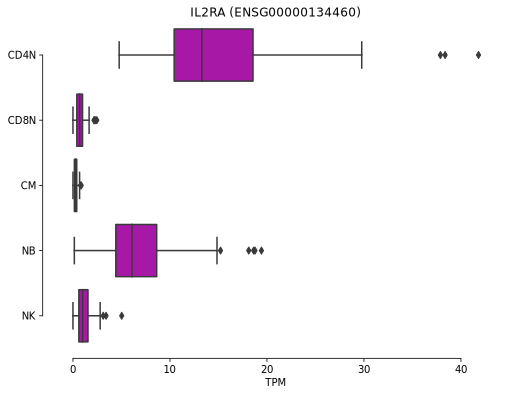

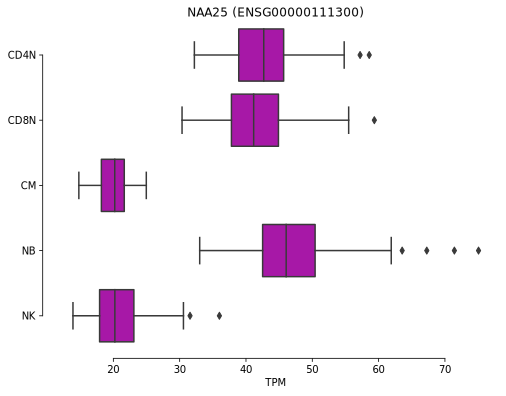

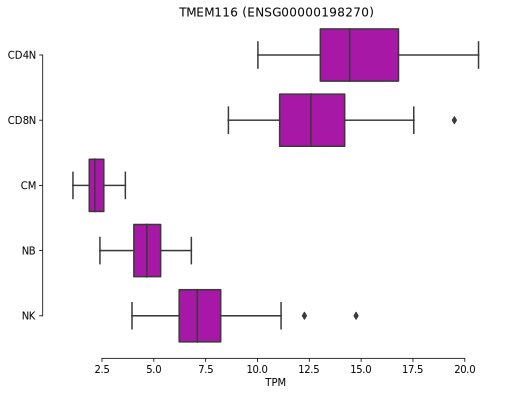

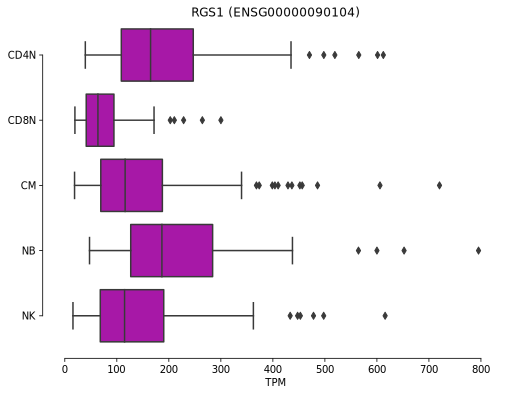

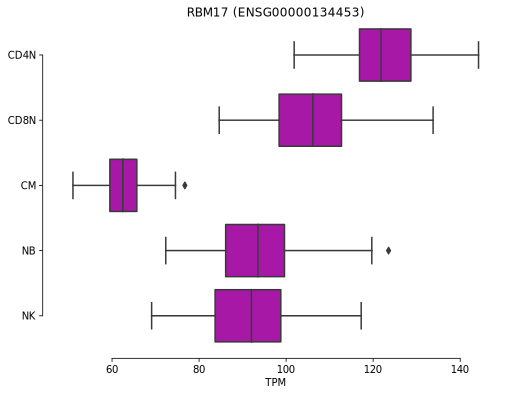

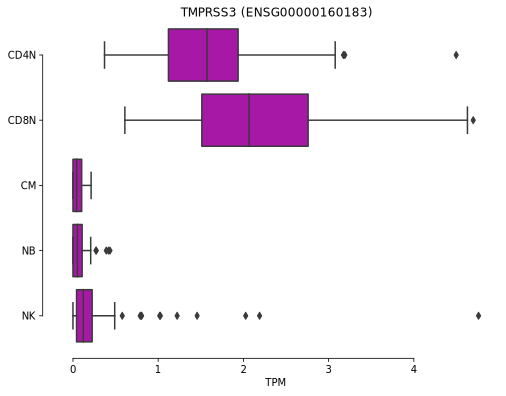

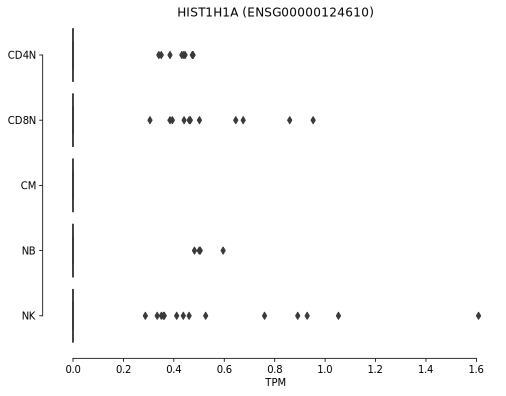

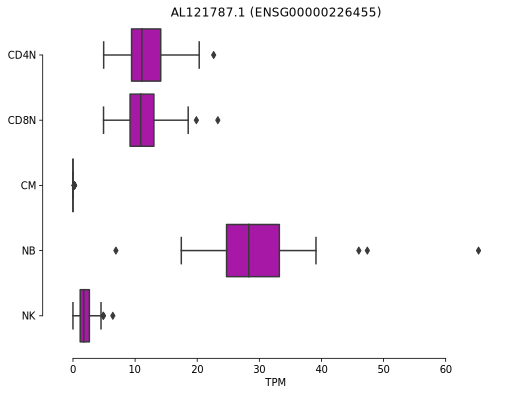

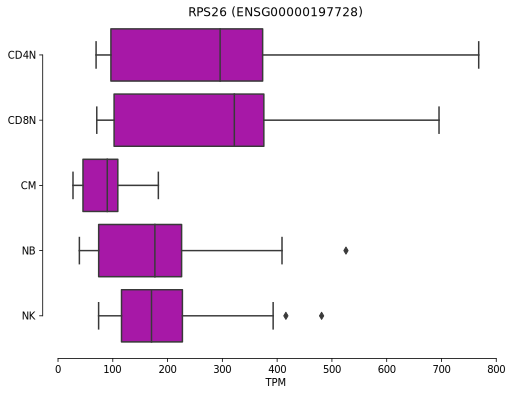

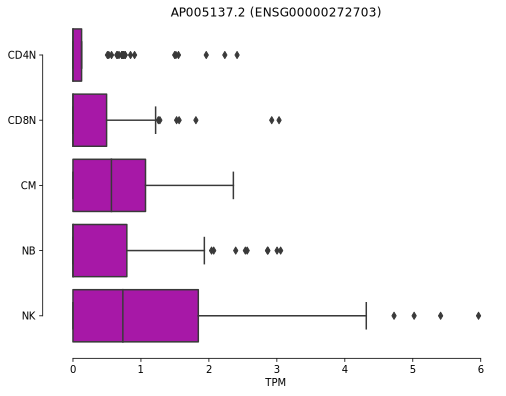

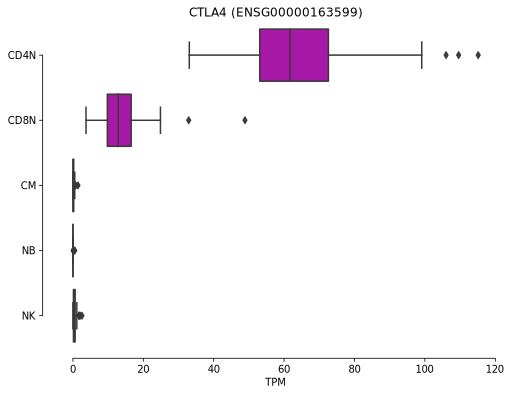

In [14]:
for gene in select_genes:    
    plot_data = select_data.loc[gene]
    plot_data.reset_index(inplace=True, drop=True)   
    plot_data = plot_data.melt(id_vars='cline', value_name='tpm').drop('variable', axis=1)
    #plot_data.dropna(inplace=True)
    plot_data.sort_values('cline', inplace=True)

    fig, ax = plt.subplots(figsize=(8,6), )
    #sns.boxplot(x="cline", y="tpm", palette=["m", "g"], data=plot_data, ax=ax, orient='v')
    sns.boxplot(y="cline", x="tpm", palette=["m"], data=plot_data, ax=ax, orient='h')
    
    # create the title 
    genename = gencode.loc[gene, 'genename']
    title = '{} ({})'.format(genename, gene)
    
    # set labels and xlims
    url = 'https://dice-database.org/genes/{}'.format(genename)
    ax.set_title(title, url=url)
    ax.set_ylabel('')
    ax.set_xlabel('$TPM$')
    sns.despine(offset=10, trim=True)
    
    fn = os.path.join(outdir, 'select_cells.tpm.{}.png'.format(gene))
    fig.savefig(fn, dpi=600)
    